### Import packages

In [14]:
# Scientific computing
import numpy as np

# Visualisation
import matplotlib.pyplot as plt

# Import the storage tank Class
from cryoevap.storage_tanks import Tank

# Import Cryogen class
from cryoevap.cryogens import Cryogen

### Define all Variables

In [15]:
# Cylindrical storage tank properties
Q_roof = 0 # Roof heat ingress / W
T_air = 298.15 # Temperature of the environment K

# Set overall heat transfer coefficient through the walls for liquid and vapour
U_L = 0.1 # W/m2/K
U_V = 0.1 # W/m2/K

# Specify wall heat partitioning fraction
eta_w= 0.9

# Specify tank operating pressure
P = 116325 # Pa

# Vertically orientated cylindrical tank volume
V_tank = 165000 #m^3 | values of 80, 60000 and 165000

a = 0.8     # Shape factor
ST = 1.02   # Thickness to diameter ratio
d_i = ((4 * V_tank)/(np.pi * a))**(1/3) # internal diameter / m
d_o = d_i * ST # external diameter / m

# Initial liquid filling / Dimensionless
LF = 0.95 # values of 0.95, 0.80 and 0.30

# Especify compound in the tank
Compound = "methane" # hydrogen, methane, ammonia, nitrogen

# Set cryogen
cryo = Cryogen(name = Compound)

cryo.set_coolprops(P)

mid_tank = Tank(d_i, d_o, V_tank, LF)

# mid_tank.cryogen.set_coolprops(P)

mid_tank.set_HeatTransProps(U_L, U_V, T_air, Q_b_fixed = None, Q_roof = Q_roof, eta_w = eta_w)

mid_tank.U_roof = U_V

# Set cryogen
mid_tank.cryogen = Cryogen(name = Compound)

mid_tank.cryogen.set_coolprops(P)

In [16]:
mid_tank.tau / 3600

18.97860560094081

In [32]:
# Define evaporation time to simulate
hours = 720
evap_time = 3600 * hours

# Thickness of the in % of the internal diameter
# ST = 1.02

# Show sim duration
print(f"Simulation time: {hours} h")

Simulation time: 720 h


In [33]:
# #from scipy.optimize import Bounds, minimize

# # Minimum and maximum practical ranges
# # of the aspect ratio
# bounds = Bounds([0.1], [10])

# # Define objective function
# def BOR_function(a):
#     # Update aspect ratio
#     # Calculate internal diameter
#     d_i = ((4 * V_tank)/(np.pi * a))**(1/3) # internal diameter / m
#     d_o = d_i * ST # external diameter / m
    
#     # Initialize tank
#     mid_tank = Tank(d_i, d_o, V_tank, LF)

#     Q_b=q_b*mid_tank.A_T
    
#     mid_tank.set_HeatTransProps(U_L, U_V, T_air, Q_b, Q_roof, eta_w)

#     mid_tank.U_roof = U_V
    
#     # Set cryogen
#     mid_tank.cryogen = Cryogen(name = Compound)
    
#     mid_tank.cryogen.set_coolprops(P)
    
#     # Define vertical spacing
#     dz = 0.003

#     # Calculate number of nodes
    
#     n_z = 1 + int(np.round(mid_tank.l_V/dz, 0))

#     # Define dimensionless computational grid
#     mid_tank.z_grid = np.linspace(0, 1, n_z)
#     print(len(mid_tank.z_grid))
#     # Execute simulation
#     mid_tank.evaporate(evap_time)
    
#     # Calculate BOR
#     BOR = 1 - mid_tank.data['V_L'][-1] / mid_tank.data['V_L'][0]

#     print("a = %.3f, BOR=%.3e" % (a, BOR))
    
#     return BOR

# # Initial liquid filling to optimise

# x0 = 1 
# res = minimize(BOR_function, x0, method='trust-constr', options={'verbose': 1}, bounds=bounds)

# if res.success:
#    print(f"\nOptimum found for Tank Volume: {V_tank}, Liquid Filling: {LF*100}%, Compound: {Compound}" + f"\nAspect Ratio = {res.x[0]:.3f}" + f"\nBOR = {res.fun*100:.3f} %")

In [35]:
#Boil-off ratio list for plotting
BOR_plot = []

# Generate aspect ratio range
AR = np.linspace(0.45, 0.55, 11)

# Generate tanks in Aspect Ratio range
for a in AR:
    # Update aspect ratio
    # Calculate internal diameter
    d_i = ((4 * V_tank)/(np.pi * a))**(1/3) # internal diameter / m
    d_o = d_i * ST # external diameter / m
    
    # Initialize tank
    mid_tank = Tank(d_i, d_o, V_tank, LF)

    # Q_b=q_b * mid_tank.A_T
    
    mid_tank.set_HeatTransProps(U_L, U_V, T_air, Q_b_fixed = None, Q_roof = Q_roof, eta_w = eta_w)

    mid_tank.U_roof = U_V
    
    # Set cryogen
    mid_tank.cryogen = Cryogen(name = Compound)
    
    mid_tank.cryogen.set_coolprops(P)
    
    # Define vertical spacing
    dz = 0.075

    # Calculate number of nodes
    n_z = 1 + int(np.round(mid_tank.l_V/dz, 0))

    # Define dimensionless computational grid
    mid_tank.z_grid = np.linspace(0, 1, n_z)
    print(len(mid_tank.z_grid))
    # Execute simulation
    mid_tank.evaporate(evap_time)
    
    # Calculate BOR
    BOR = 1 - mid_tank.data['V_L'][-1] / mid_tank.data['V_L'][0]
    
    # Save BOR value
    BOR_plot.append(BOR*100)
    
    print("a = %.3f, BOR=%.3e" % (a, BOR))
    # print("BOR = %.3f %% | B_l = %.3f " % (BOR * 100, mid_tank.b_l_dot))
    # print(f"Aspect Ratio:{a:.3f}, Altura: {mid_tank.l:.3f} , Diámetro interno:{mid_tank.d_i:.3f}, Volumen:{mid_tank.V} \n")
print("Simulation end")

26
a = 0.500, BOR=1.912e-02
26
a = 0.511, BOR=1.912e-02
27
a = 0.522, BOR=1.913e-02
27
a = 0.533, BOR=1.913e-02
27
a = 0.544, BOR=1.914e-02
28
a = 0.556, BOR=1.915e-02
28
a = 0.567, BOR=1.916e-02
28
a = 0.578, BOR=1.917e-02
29
a = 0.589, BOR=1.919e-02
29
a = 0.600, BOR=1.920e-02
Simulation end


In [31]:
n_z

20

In [25]:
mid_tank.LF

0.9439168497069254

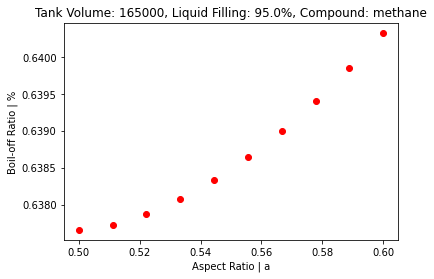

In [24]:
# Create a plot
plt.plot(AR, BOR_plot,"ro")

# Add labels and title
plt.xlabel('Aspect Ratio | a')
plt.ylabel('Boil-off Ratio | %')
plt.title(f'Tank Volume: {V_tank}, Liquid Filling: {LF*100}%, Compound: {Compound}')


# Save the plot
# plt.savefig(f'{Compound}/V_{V_tank}_LF_{LF*100}_C_{Compound}_evap.png')

# Display the plot
plt.show()

In [21]:
mid_tank.Q_b

72095.06879511033

In [22]:
mid_tank.U_L

0.1

In [23]:
mid_tank.U_L*mid_tank.A_T*(T_air - mid_tank.cryogen.T_sat)

72095.06879511033